In [ ]:
import pandas as pd
df=pd.read_csv("/content/car_Dekho_DA.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#From which manufacturing year to which manufacturing year vehicles are present in this data ?
min_year = df['Year'].min()
max_year = df['Year'].max()
print(f"min year: {min_year}, max year: {max_year}")

min year: 2003, max year: 2018


In [ ]:
#What is the lowest price to which a vehicle is sold ?
lowest_price_sold = df['Selling_Price'].min()
print(f"Lowest price which vehicle is sold: {lowest_price_sold} lakhs")

Lowest price which vehicle is sold: 0.1 lakhs


In [ ]:
#What is the highest price to which a vehicle is sold ?
# Find the highest selling price
highest_price_sold = df['Selling_Price'].max()
print(f"Highest price which vehicle is sold: {highest_price_sold} lakhs")

Highest price which vehicle is sold: 35.0 lakhs


In [ ]:
#How many records are there in this data ?
num_records = df.shape[0]
print(f"{num_records} records")

301 records


In [ ]:
#Are there any missing records in this data ?
missing_records = df.isnull().sum().sum()
print(f"{missing_records} missing records")

0 missing records


In [ ]:
#How many different vehicles are present in this data ?
num_different_vehicles = df['Car_Name'].nunique()
print(f"{num_different_vehicles} different vehicles")

98 different vehicles


In [ ]:
#Which is the most sold vehicle in this data ?
most_sold_vehicle = df['Car_Name'].value_counts().idxmax()
print(f"{most_sold_vehicle} is the most sold vehicle")

city is the most sold vehicle


In [ ]:
#Does the database include any CNG vehicle ? If yes how many of them are there ?
num_of_cng = (df["Fuel_Type"] == "CNG").sum()
print(f"{num_of_cng} cng vehicles")

2 cng vehicles


In [ ]:
#How many vehicles here are for sale from Individuals directly ?
individual_sales_count = df[df['Seller_Type'] == 'Individual'].shape[0]
print(f"{individual_sales_count} vehicles for sale from Individuals")

106 vehicles for sale from Individuals


In [ ]:
#Does this database contain auto transmission vehicles ? If yes how many of them are there ?
auto_transmission_count = df[df['Transmission'] == 'Automatic'].shape[0]
print(f"{auto_transmission_count} auto transmission vehicles")

40 auto transmission vehicles


In [ ]:
#How many single person owned vehicles are there in this database ?
single_owner = df[df['Owner'] == 0].shape[0]
print(f"{single_owner} single person owned vehicles")

290 single person owned vehicles


In [ ]:
#Which is the most and least cost depreciated vehicle in data ?
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']

most_depreciated = df.loc[df['Depreciation'].idxmax(), 'Car_Name']
least_depreciated = df.loc[df['Depreciation'].idxmin(), 'Car_Name']

print(f"{most_depreciated} is the most cost depreciated vehicle")
print(f"{least_depreciated} is the least cost depreciated vehicle")

land cruiser is the most cost depreciated vehicle
Honda Activa 4G is the least cost depreciated vehicle


In [ ]:
#Which brands of vehicles are less affected by cost depreciation ?
min_depreciation = df['Depreciation'].min()
least_depreciated_vehicles = df[df['Depreciation'] == min_depreciation]
vehicle_names = least_depreciated_vehicles['Car_Name'].unique()
print(f"{vehicle_names} are less affected by cost depreciation")

['Honda Activa 4G'] are less affected by cost depreciation


In [ ]:
#Are there any factors which you feel affect the cost depreciation ?
correlation_factors = df[['Year', 'Kms_Driven', 'Depreciation']].corr()['Depreciation']
print(correlation_factors)

Year           -0.333746
Kms_Driven      0.333832
Depreciation    1.000000
Name: Depreciation, dtype: float64


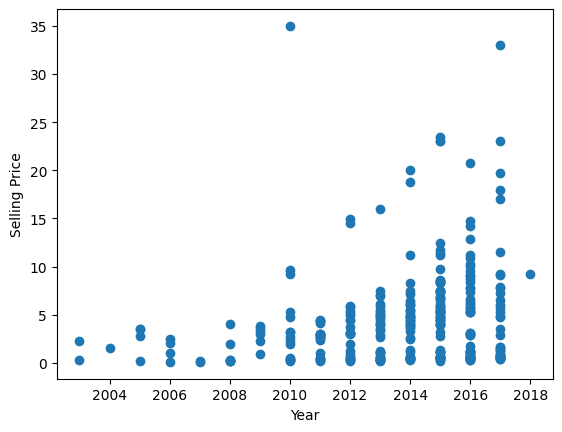

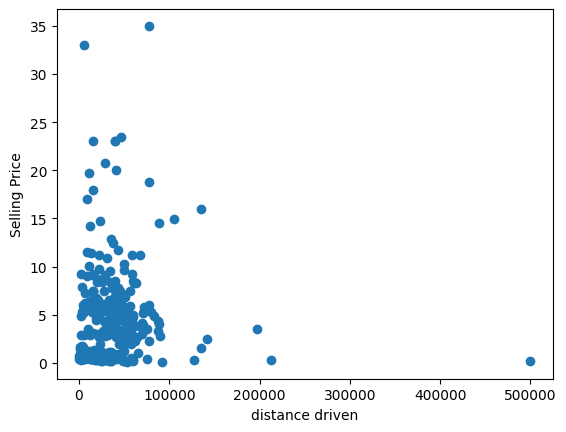

In [45]:
#In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
import matplotlib.pyplot as plt
plt.scatter(df['Year'], df['Selling_Price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()
plt.scatter(df['Kms_Driven'], df['Selling_Price'])
plt.xlabel('distance driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#Can we get idea about newest vehicles i.e. after 2014 manufactured ?
newest_vehicles = df[df['Year'] > 2014]
newest_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14


In [ ]:
#Can we find out data of only two wheelers from this data ? Which is the oldest bike sold here?
two_wheelers = df[df["Present_Price"]<3.5]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.reset_index(drop=True,inplace=True)
two_wheelers.head()
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
89,Hero Super Splendor,2005,0.2,0.57,55000,Petrol,Individual,Manual,0


In [ ]:
#Which is the newest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
9,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
26,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0
28,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0
29,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0
30,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0
32,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0


In [ ]:
#Which is the most sold bike here?
most_sold_bike = two_wheelers['Selling_Price'].value_counts().idxmax()
two_wheelers[two_wheelers['Selling_Price']==most_sold_bike]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
59,Honda Activa 4G,2017,0.45,0.510,4000,Petrol,Individual,Automatic,0
60,Bajaj Avenger Street 220,2011,0.45,0.950,24000,Petrol,Individual,Manual,0
61,TVS Apache RTR 180,2014,0.45,0.826,23000,Petrol,Individual,Manual,0
62,Bajaj Pulsar NS 200,2012,0.45,0.990,14500,Petrol,Individual,Manual,0
63,Bajaj Avenger 220 dtsi,2010,0.45,0.950,27000,Petrol,Individual,Manual,0
64,Hero Splender iSmart,2016,0.45,0.540,14000,Petrol,Individual,Manual,0
65,Activa 3g,2016,0.45,0.540,500,Petrol,Individual,Automatic,0
66,Hero Passion Pro,2016,0.45,0.550,1000,Petrol,Individual,Manual,0


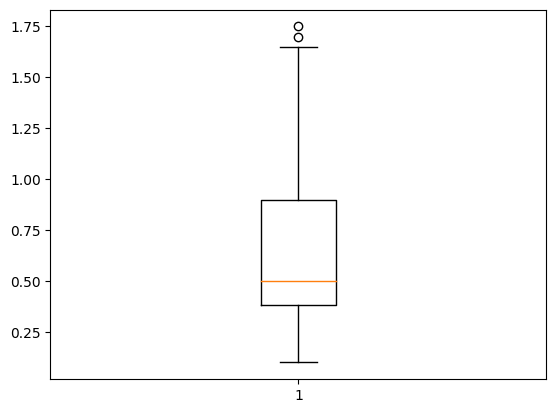

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0


In [ ]:
#Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
import matplotlib.pyplot as plt
plt.boxplot(two_wheelers.Selling_Price)
plt.show()
two_wheelers[two_wheelers.Selling_Price>1.6]

In [ ]:
#Can we find out data of only cars from this data ?
cars=df[df['Present_Price']>3.5]
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [ ]:
#Which is the oldest car sold here?
old=cars['Selling_Price'].min()
cars[cars['Selling_Price']==old]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
47,wagon r,2006,1.05,4.15,65000,Petrol,Dealer,Manual,0,3.1


In [ ]:
#Which is the newest car sold here?
new=cars['Selling_Price'].max()
cars[cars['Selling_Price']==new]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6


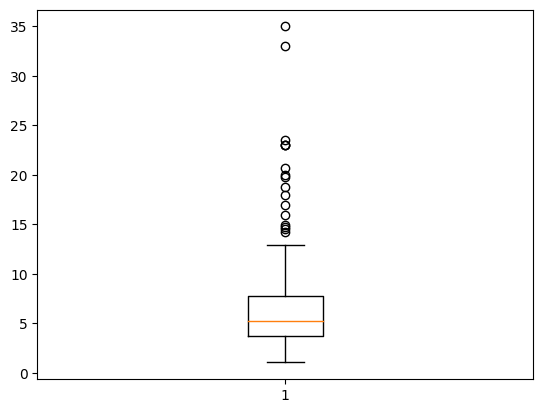

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [ ]:
#Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?
import matplotlib.pyplot as plt
plt.boxplot(cars.Selling_Price)
plt.show()
cars[cars.Selling_Price>1.6]